In [2]:
import pandas as pd
import numpy as np
import semopy as sem

# 設定隨機種子以確保結果的可重現性
np.random.seed(42)

# 定義變量
variables = ["work1", "work2", "work3", "happy", "mood1", "mood2", 
             "perform1", "perform2", "approval", "beliefs", "selftalk", "imagery"]

# 生成模擬的變異數-共變異數矩陣
cov_matrix_simulated = np.random.rand(len(variables), len(variables))
cov_matrix_simulated = (cov_matrix_simulated + cov_matrix_simulated.T) / 2  # 使矩陣對稱
np.fill_diagonal(cov_matrix_simulated, 1)  # 將對角線設置為1，表示變量自身的變異數

# 將模擬的變異數-共變異數矩陣轉換為DataFrame，以符合後續分析的要求
dataframe = pd.DataFrame(data=cov_matrix_simulated, index=variables, columns=variables)
dataframe

,work1,work2,work3,happy,mood1,mood2,perform1,perform2,approval,beliefs,selftalk,imagery
work1,1.000000,0.891578,0.594032,0.451636,0.351364,0.272336,0.031803,0.588579,0.561924,0.468435,0.414012,0.544888
work2,0.891578,1.000000,0.483500,0.140538,0.244548,0.398053,0.623703,0.308206,0.519697,0.108237,0.594118,0.351989
work3,0.594032,0.483500,1.000000,0.599234,0.781000,0.437594,0.657201,0.450065,0.045235,0.619318,0.641818,0.875654
happy,0.451636,0.140538,0.599234,1.000000,0.448586,0.425965,0.381698,0.773439,0.183336,0.411872,0.210882,0.421635
mood1,0.351364,0.244548,0.781000,0.448586,1.000000,0.587881,0.684585,0.904543,0.059961,0.562840,0.136581,0.422060
mood2,0.272336,0.398053,0.437594,0.425965,0.587881,1.000000,0.107484,0.637206,0.355481,0.897504,0.599676,0.450867
perform1,0.031803,0.623703,0.657201,0.381698,0.684585,0.107484,1.000000,0.117732,0.588730,0.628351,0.574456,0.213594
perform2,0.588579,0.308206,0.450065,0.773439,0.904543,0.637206,0.117732,1.000000,0.634678,0.716369,0.815849,0.732789
approval,0.561924,0.519697,0.045235,0.183336,0.059961,0.355481,0.588730,0.634678,1.000000,0.526482,0.208668,0.858999
beliefs,0.468435,0.108237,0.619318,0.411872,0.562840,0.897504,0.628351,0.716369,0.526482,1.000000,0.701653,0.395562


建立模型

       DoF         chi2     RMSEA       NFI      TLI      CFI       GFI
Value   47  2775.366966  0.470708  0.314351  0.03779  0.31479  0.314351
       DoF  DoF Baseline         chi2  chi2 p-value  chi2 Baseline      CFI  \
Value   47            66  2775.366966           0.0    4047.797416  0.31479   

            GFI      AGFI       NFI      TLI     RMSEA        AIC         BIC  \
Value  0.314351  0.037174  0.314351  0.03779  0.470708  40.894548  151.631323   

          LogLik  
Value  10.552726  


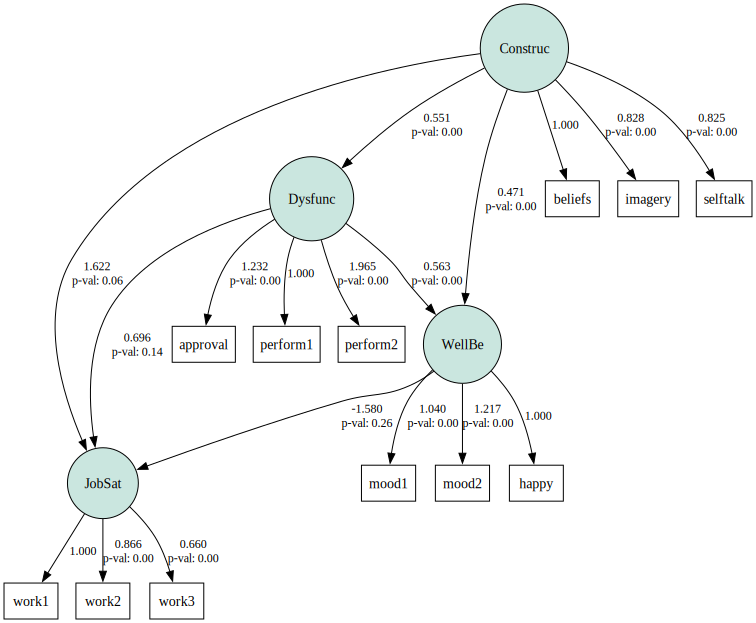

In [5]:
# 定義SEM模型
mod = """
# measurement model
Construc =~ beliefs + selftalk + imagery
Dysfunc =~ perform1 + perform2 + approval
WellBe =~ happy + mood1 + mood2
JobSat =~ work1 + work2 + work3
# error covariance
happy ~~ mood2 
# structural part
Dysfunc ~ Construc
WellBe ~ Construc + Dysfunc
JobSat ~ Construc + Dysfunc + WellBe
"""

# 擬合SEM模型
model = sem.Model(mod)
res = model.fit(obj="MLW", solver="SLSQP", cov=dataframe, n_samples=263)

# 獲取和顯示估計結果
estimates = model.inspect(std_est=True)
stats = sem.calc_stats(model)
basic_stats = stats[["DoF", "chi2", "RMSEA", "NFI", "TLI", "CFI", "GFI"]]

# 打印基本統計量
print(basic_stats)

# 或打印出詳細的分析報表
print(stats)

# 繪製模型結構圖，將生成的圖像保存為"model_structure.png"
sem.semplot(model, "model_structure.png")